# Dataset

In [ ]:
# Menghubungkan Ke Google Drive Untuk Memanggil Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Arahkan Jalur Untuk Memanggil Dataset Dari Sumber Folder Utama
%cd /content/drive/MyDrive/Project Data Wrangling Visualization - Teach4Hope

/content/drive/MyDrive/Project Data Wrangling Visualization - Teach4Hope


In [ ]:
# Melihat Isi Folder Apakah Dataset Telah Ada
!ls

filtered_dataplayer.csv  highest_earning_players.csv  Project_Data_Wrangling.ipynb
filtered_datateams.csv	 highest_earning_teams.csv


In [ ]:
# Memanggil modul yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Memanggil data
dfplayer = pd.read_csv('highest_earning_players.csv')

# dfplayer['PlayerId'].is_unique
dfplayer['PlayerId'].value_counts()

1233     2
25047    2
3883     1
1163     1
14528    1
        ..
55138    1
49925    1
52429    1
49923    1
1100     1
Name: PlayerId, Length: 998, dtype: int64

### 1) Identifikasi duplikat pada data `highest_earning_players.csv`

In [ ]:
# Mengecek duplikat pada data highest_earning_players.csv
dfplayer.duplicated().sum()

0

### 2) Identifikasi Missing Value pada data `highest_earning_players.csv`

In [ ]:
# Mengecek missing value pada data highest_earning_players.csv
dfplayer.isna().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [ ]:
# Menampilkan 10 data teratas
dfplayer.head(10)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter
7,12169,Fernando,Alvarenga,fer,br,1063038.92,Counter-Strike: Global Offensive,First-Person Shooter
8,2455,Gabriel,Toledo,FalleN,br,1059938.92,Counter-Strike: Global Offensive,First-Person Shooter
9,12182,Marcelo,David,coldzera,br,1021901.46,Counter-Strike: Global Offensive,First-Person Shooter


In [ ]:
# Mengecek menggunakan syntax info
dfplayer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
# Menampilkan statistik deskriptif dari data
dfplayer.describe()

,PlayerId,TotalUSDPrize
count,1000.000000,1.000000e+03
mean,27793.587000,3.977932e+05
std,22170.225194,6.908492e+05
min,1000.000000,2.417167e+04
25%,5374.500000,8.378962e+04
50%,23502.000000,1.683284e+05
75%,48127.250000,3.937352e+05
max,83085.000000,6.952597e+06


In [ ]:
dfplayer

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


3) Identifikasi Outlier pada data `highest_earning_players.csv`

<Axes: xlabel='TotalUSDPrize'>

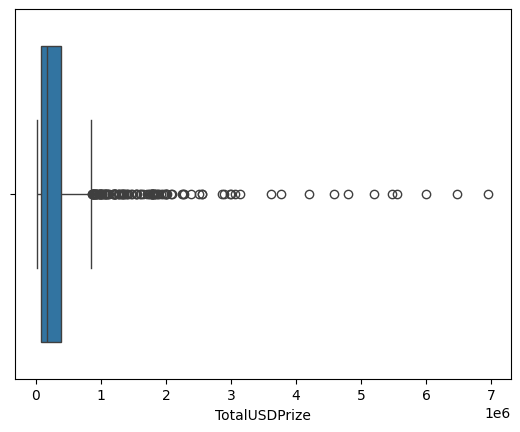

In [ ]:
# Mengecek Outlier
sns.boxplot(data=dfplayer,x= "TotalUSDPrize")

In [ ]:
# mengecek batas maksimum dari data
dfplayer.TotalUSDPrize.max()

6952596.58

4) Identifikasi Inkonsistensi pada data `highest_earning_players.csv`

In [ ]:
# Identifikasi Inkonsistensi kolom Game
dfplayer["Game"].unique()

array(['Counter-Strike: Global Offensive', 'Dota 2', 'League of Legends',
       'Fortnite', 'Overwatch', 'Starcraft II', 'Heroes of the Storm',
       'PUBG', 'Arena of Valor', 'Hearthstone'], dtype=object)

In [ ]:
# Identifikasi Inkonsistensi kolom Genre
dfplayer["Genre"].unique()

array(['First-Person Shooter', 'Multiplayer Online Battle Arena',
       'Battle Royale', 'Strategy', 'Collectible Card Game'], dtype=object)

In [ ]:
dfplayer.to_csv('filtered_dataplayer.csv', index=False)

# Data Kedua

In [ ]:
# Memanggil data kedua
dfteams = pd.read_csv('highest_earning_teams.csv')

### 1) Identifikasi duplikat pada data `highest_earning_teams.csv`

In [ ]:
# Mengecek duplikat pada data highest_earning_teams.csv
dfteams.duplicated().sum()

0

### 2) Identifikasi Missing Value pada data `highest_earning_teams.csv`

In [ ]:
# Mengecek missing value pada data highest_earning_teams.csv
dfteams.isna().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [ ]:
# Menampilkan data 10 teratas
dfteams.head(10)

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.00,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.50,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.50,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.50,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.00,6,Overwatch,First-Person Shooter
5,856,Vancouver Titans,950000.00,4,Overwatch,First-Person Shooter
6,769,Shanghai Dragons,755000.00,5,Overwatch,First-Person Shooter
7,774,Los Angeles Gladiators,709605.19,13,Overwatch,First-Person Shooter
8,861,Atlanta Reign,596098.00,9,Overwatch,First-Person Shooter
9,770,Los Angeles Valiant,535000.00,6,Overwatch,First-Person Shooter


In [ ]:
# Mengecek menggunakan syntax info
dfteams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [ ]:
# Menampilkan statistik deskriptif dari data
dfteams.describe()

,TeamId,TotalUSDPrize,TotalTournaments
count,928.000000,9.280000e+02,928.000000
mean,3836.927802,5.399183e+05,31.696121
std,8438.383941,1.902399e+06,61.075848
min,101.000000,1.750000e+02,1.000000
25%,227.000000,3.915000e+04,4.000000
50%,529.000000,1.165306e+05,11.000000
75%,789.000000,3.231491e+05,33.000000
max,24997.000000,3.381064e+07,808.000000


### 3) Identifikasi Outlier pada data `highest_earning_teams.csv`

<Axes: xlabel='TotalUSDPrize'>

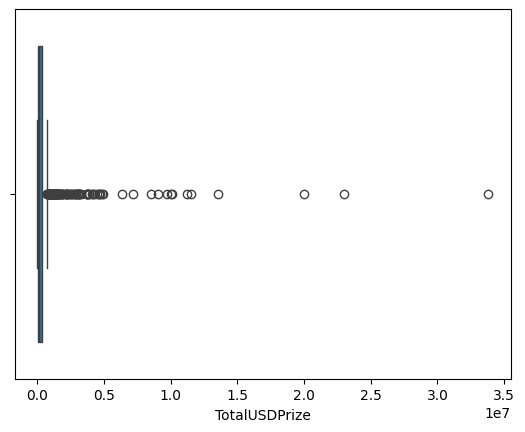

In [ ]:
# Mengecek Outlier
sns.boxplot(data=dfteams,x= "TotalUSDPrize")

<Axes: xlabel='TotalTournaments'>

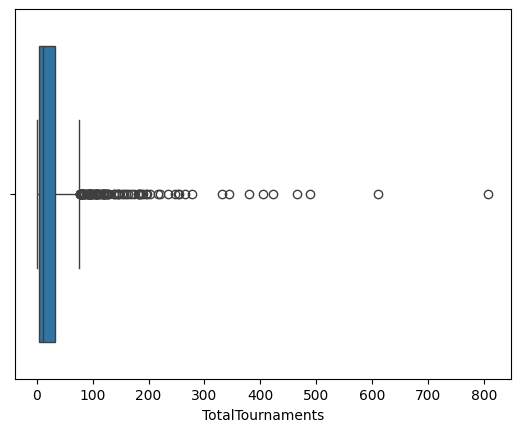

In [ ]:
sns.boxplot(data=dfteams, x="TotalTournaments")


### 4) Handling Outlier

In [ ]:
# Handling Outlier
Q1 = dfteams['TotalTournaments'].quantile(0.25)
Q3 = dfteams['TotalTournaments'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Hapus outlier
df_filtered = dfteams[(dfteams['TotalTournaments'] >= lower_bound) & (dfteams['TotalTournaments'] <= upper_bound)]

<Axes: xlabel='TotalTournaments'>

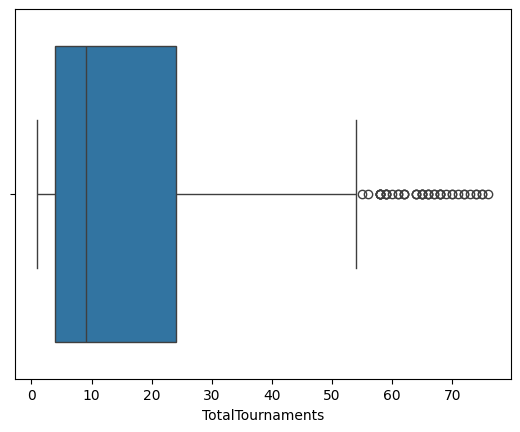

In [ ]:
sns.boxplot(data=df_filtered, x="TotalTournaments")

5) Identifikasi Inkonsistensi pada data `highest_earning_teams.csv`

In [ ]:
# Identifikasi Inkonsistensi kolom Game
dfteams["Game"].unique()

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [ ]:
# Identifikasi Inkonsistensi kolom Genre
dfteams["Genre"].unique()

array(['First-Person Shooter', 'Strategy',
       'Multiplayer Online Battle Arena', 'Battle Royale',
       'Collectible Card Game'], dtype=object)

In [ ]:
# Menyimpan file dalam format csv
df_filtered.to_csv('filtered_datateams.csv', index=False)